# Exploratory Data Analysis on Boston Housing Dataset

## Predicting Housing Prices from Boston Housing Dataset 

#### This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.
####  We will adopt some basic exploratory data analysis by  utilizing some statistical tools.

In [2]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn


import seaborn as sns
from matplotlib import rcParams
sns.set_style('whitegrid')
sns.set_context('poster')

![alt text](house.png)

### Loading Dataset

In [18]:
boston_df = pd.read_csv('housing.csv')
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Unnamed: 14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [19]:
boston_df.shape

(506, 15)

### Describing the Dataset

In [20]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   crim         506 non-null    float64
 1   zn           506 non-null    float64
 2   indus        506 non-null    float64
 3   chas         506 non-null    int64  
 4   nox          506 non-null    float64
 5   rm           506 non-null    float64
 6   age          506 non-null    float64
 7   dis          506 non-null    float64
 8   rad          506 non-null    int64  
 9   tax          506 non-null    int64  
 10  ptratio      506 non-null    float64
 11  black        506 non-null    float64
 12  lstat        506 non-null    float64
 13  medv         506 non-null    float64
 14  Unnamed: 14  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


### Summary Statistics

In [21]:
# Showing summary of each columns using describe()
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Unnamed: 14
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,1.0
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.0
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,1.0
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,1.0
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,1.0
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,1.0
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.0


## Data Preprocessing

After loading the data, it’s a good practice to see if there are any missing values in the data. Generally, NaN or missing values can be in any form like 0 or may be written as “missing” and in our case, we can see that there are a lot of 0’s, so we can replace them with NaN to calculate how much data we are missing.

In [22]:
boston_df.isna().sum()

crim           0
zn             0
indus          0
chas           0
nox            0
rm             0
age            0
dis            0
rad            0
tax            0
ptratio        0
black          0
lstat          0
medv           0
Unnamed: 14    0
dtype: int64

In [23]:
boston_df = boston_df.drop('Unnamed: 14',axis=1)

In [24]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [25]:
boston_df.zn.replace(0,np.nan,inplace = True)
boston_df.chas.replace(0,np.nan,inplace=True)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       134 non-null    float64
 2   indus    506 non-null    float64
 3   chas     35 non-null     float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


We count the percent of the number of missing values for each feature using isnull().sum()



In [26]:
#Percent of data which is not available
boston_df.isnull().sum()/len(data) * 100

crim        0.000000
zn         73.517787
indus       0.000000
chas       93.083004
nox         0.000000
rm          0.000000
age         0.000000
dis         0.000000
rad         0.000000
tax         0.000000
ptratio     0.000000
black       0.000000
lstat       0.000000
medv        0.000000
dtype: float64

Both “ZN” and “CHAS” are missing more than 70% data, so will remove both these features.

In [27]:
boston_df = boston_df.drop(['zn','chas'],axis=1)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   indus    506 non-null    float64
 2   nox      506 non-null    float64
 3   rm       506 non-null    float64
 4   age      506 non-null    float64
 5   dis      506 non-null    float64
 6   rad      506 non-null    int64  
 7   tax      506 non-null    int64  
 8   ptratio  506 non-null    float64
 9   black    506 non-null    float64
 10  lstat    506 non-null    float64
 11  medv     506 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 47.6 KB


## Exploratory Data Analysis
Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.



Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.



/Users/nai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


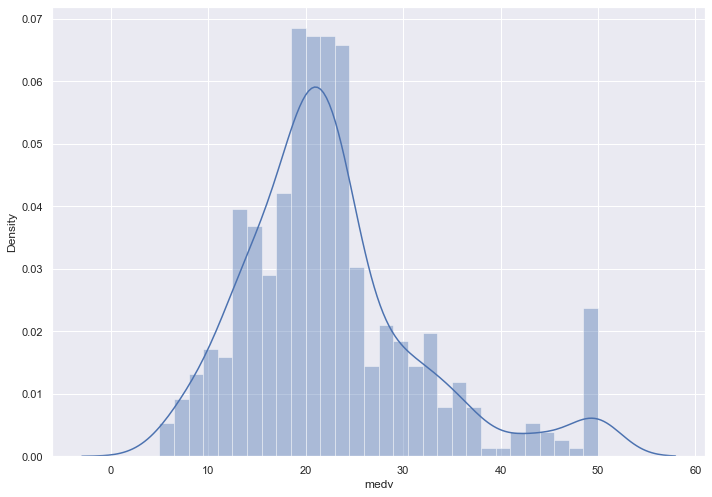

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['medv'], bins=30)
plt.show()

We see that the values of MEDV are distributed normally with few outliers.

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmapfunction from the seaborn library to plot the correlation matrix.

<AxesSubplot:>

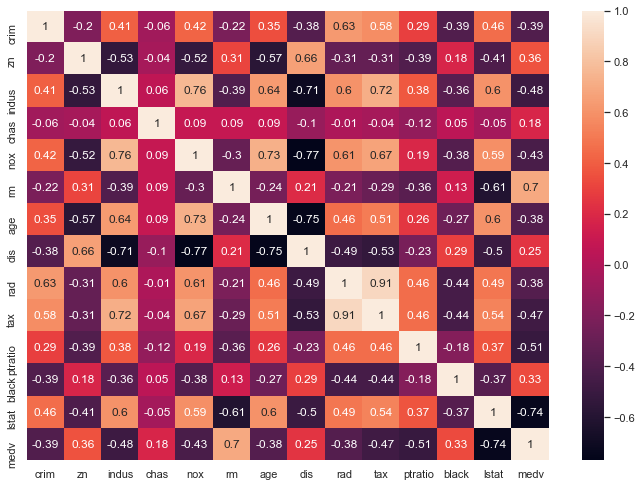

In [42]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

### Observations:
To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation withMEDV(0.7) whereas LSTAT has a high negative correlation with MEDV(-0.74).

### Step 1: Check for linearity with Scatter Plot

We'll see the relationship between prices and other variables because in order to create a good linear model the features should have a linear relationship with prices.

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['medv'], bins=30)
plt.show()

#### We can see a strong positive correlation between no. of rooms and price. No. of rooms increases/decreases with increase/decrease in price.

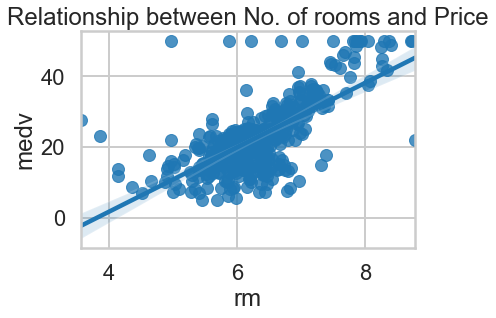

In [29]:
# Between prices and No. of rooms
sns.regplot(x="rm",y='medv', data=boston_df, fit_reg=True)
plt.title("Relationship between No. of rooms and Price")
plt.show()


#### We can see a strong negative correlation between lower status population and price. Population of lower status  increases/decreases with decrease/increase in price.

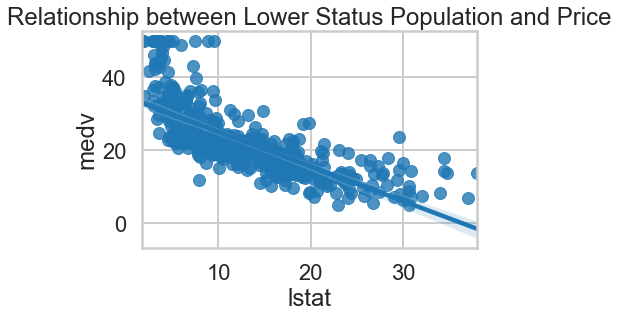

In [30]:
# Between prices and Lower Status Population
sns.regplot(y="medv",x="lstat", data=boston_df, fit_reg= True)
plt.title("Relationship between Lower Status Population and Price")
plt.show()

#### We can see a strong negative correlation between NOX concentraation in air and price. The more/less concentration of NOX is in air the less/more the housing prices. 

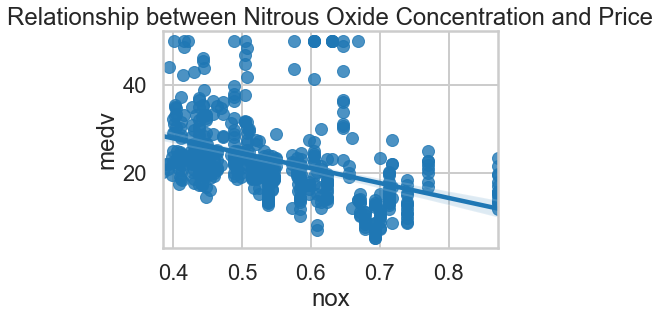

In [31]:
# Between prices and Nitrous Oxide Concentration
sns.regplot(y="medv",x="nox", data=boston_df, fit_reg= True)
plt.title("Relationship between Nitrous Oxide Concentration and Price")
plt.show()

#### We can see a strong postive correlation between distance of 5 employment center from town and price. The closer/farther the employment center from town the more/less the housing prices. 

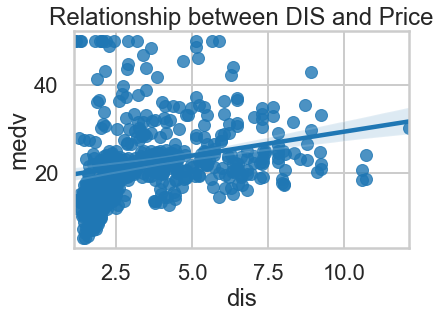

In [32]:
# Between prices and Weighted distance between 5 Boston Employment Center
sns.regplot(y="medv",x="dis", data=boston_df, fit_reg= True)
plt.title("Relationship between DIS and Price")
plt.show()

#### As the no. of students increases per teacher the housing prices decreases.

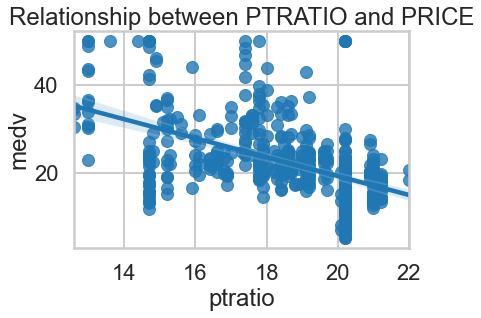

In [33]:
# Between prices and Pupil-Teacher ratio by town
sns.regplot(y="medv",x="ptratio", data=boston_df, fit_reg= True)
plt.title("Relationship between PTRATIO and PRICE")
plt.show()

#### Weaker still descent predictor .As the no. of crimes increases the housing prices decreases.

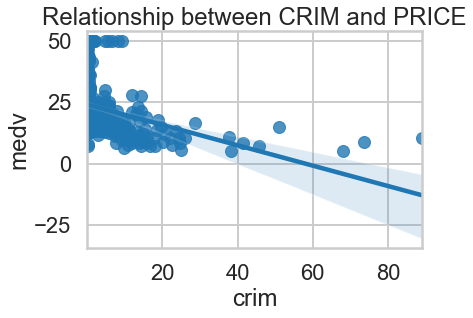

In [34]:
# Between prices and per capita crime rate by town
sns.regplot(y="medv",x="crim", data=boston_df, fit_reg= True)
plt.title("Relationship between CRIM and PRICE")
plt.show()

### Step: 2 Checking for Normality with histograms

#### We must check for normality among variables . If they skewed in any way we need to transform them by taking log in order to normise them.

We saw that the scatter plot between Price and Crime Rate an observed an exponential decay of crimes. This can be overcome by normalising.

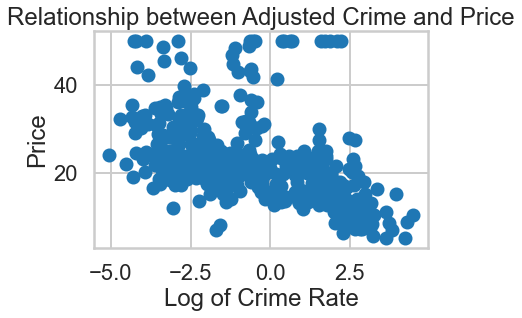

In [35]:
adj_CRIM = np.log(boston_df.crim)
plt.scatter(adj_CRIM , boston_df.medv)
plt.xlabel("Log of Crime Rate")
plt.ylabel("Price")
plt.title("Relationship between Adjusted Crime and Price")
plt.show()

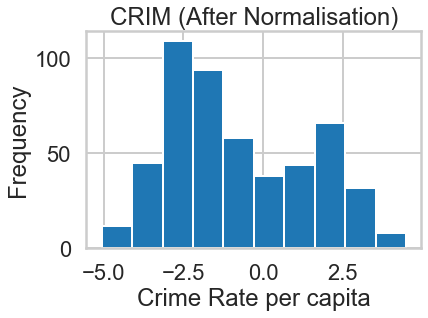

In [36]:
plt.hist(adj_CRIM)
plt.xlabel("Crime Rate per capita")
plt.ylabel("Frequency")
plt.title("CRIM (After Normalisation)")
plt.show()


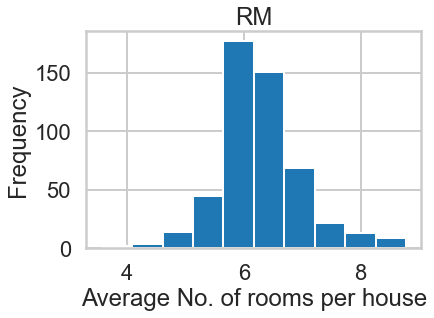

In [37]:
plt.hist(boston_df.rm)
plt.xlabel("Average No. of rooms per house")
plt.ylabel("Frequency")
plt.title("RM")
plt.show()


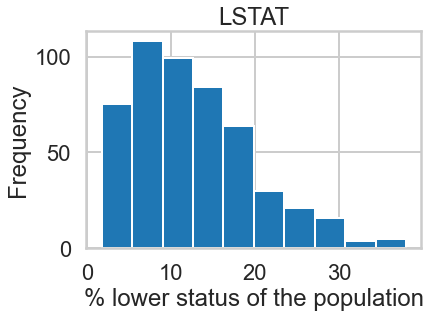

In [38]:
plt.hist(boston_df.lstat)
plt.xlabel("% lower status of the population")
plt.ylabel("Frequency")
plt.title("LSTAT")
plt.show()


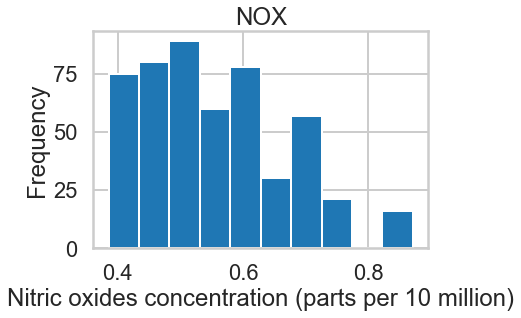

In [39]:
plt.hist(boston_df.nox)
plt.xlabel("Nitric oxides concentration (parts per 10 million)")
plt.ylabel("Frequency")
plt.title("NOX")
plt.show()

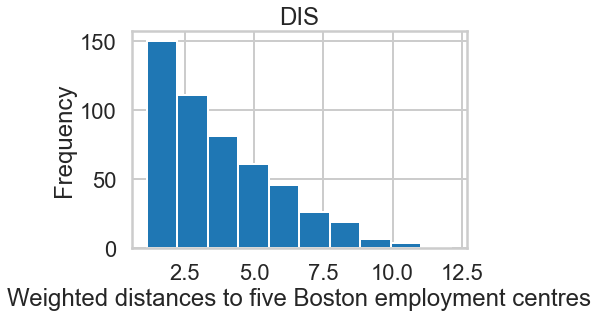

In [40]:
plt.hist(boston_df.dis)
#plt.hist(np.log(boston_df.DIS))
plt.xlabel("Weighted distances to five Boston employment centres")
plt.ylabel("Frequency")
plt.title("DIS")
plt.show()

### nsights and Recommendations:

1. Housing prices (MEDV) are positively correlated with the number of rooms (RM) and negatively correlated with the percentage of lower status of the population (LSTAT). This suggests that larger and more expensive homes tend to be located in wealthier neighborhoods.

2. The PTRATIO (pupil-teacher ratio by town) variable does not appear to have a strong correlation with housing prices, although it is negatively correlated with some other variables such as RM and ZN (proportion of residential land zoned for lots over 25,000 sq.ft.). This suggests that the quality of schools may not be a major factor in determining housing prices.

3. The RAD (index of accessibility to radial highways) variable appears to have a weak positive correlation with housing prices, while the DIS (weighted distances to five Boston employment centers) variable appears to have a weak negative correlation with housing prices. This suggests that proximity to highways and employment centers may have a minor impact on housing prices.

Based on these insights, here are some recommendations:

1. When pricing a home, real estate agents and appraisers should pay close attention to the number of rooms and the percentage of lower status of the population in the surrounding neighborhood.

2. Homebuyers who are looking for good schools should not rely solely on the PTRATIO variable as an indicator of school quality, but should also consider other factors such as test scores, graduation rates, and extracurricular activities.

3. Homebuyers who value proximity to highways and employment centers should be aware that these factors may have only a minor impact on housing prices, and should not be the sole determinants of their purchasing decisions.






# Try with ChatGpt

Q: Can you do Exploratory Data Analysis on Boston Housing Dataset in the link:https://drive.google.com/file/d/1hWbwUYHyDiuGucU8zeBnXkw0H3tMsBKJ/view

Q: How to do data analysis with it?

Q: Can you give us some insights and recommendation?